# [IAPR][iapr]: Project


**Group ID:** 26

**Author 1 (sciper):** Andrea Oliveri (283506)  
**Author 2 (sciper):** Charles Berger (272018)   
**Author 3 (sciper):** Chun Hei Michael Chan (311722)  


**Release date:** 07.05.2021  
**Due date:** 03.06.2021 (23h59) 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

An anonymous researcher that we will name Lann Yecun is convinced that the MNIST dataset still has great potential. He decides to create a playing card game based on MNIST digits and different figures. The game uses a standard 52 card deck which is composed of four French suits/colours: clubs (&#9827;), diamonds (&#9830;), hearts (&#9829;) and spades (&#9824;). Each suit includes 10 digit cards (from 0 to 9) and 3 figures (Jack-J, Queen-Q, and King-K). Here is an example of the 13 spade cards with their name.


<img src="media/example_cards.png">


We can find the same arrangement of cards for the clubs, diamonds, and hearts. 


## 1. Rules


### 1.1 Standard

The rules are based on the simple battle card game. The goal of the game is to win as many points as possible. Each turn, the 4 players play a card in front of them. As displayed in the example below. The rules are the following:

- The cards are ranked in the following order : **0 < 1 < 2 < 3 < 4 < 5 < 6 < 7 < 8 < 9 < J < Q < K**.
- The player with the highest-ranked card wins the round and obtains **1 point**. 
- If the highest-ranked card is the same for multiple players we call it a draw and all winners get **1 points**. 
- In this configuration, we **do not** take into account the suits. The game only rely on the card ranks. 
- The game lasts 13 rounds. After the last round, the winner is the player that has the largest number of points. 
- In the example below Player 1 wins the round with his Queen ( 0 < 8 < J < **Q**).

If two or more players have the same number of points they share the victory.

### 1.2 Advanced

The advanced rules take into account the suits. 

- At the beginning of **each round** a random player is designated as the **dealer**. The dealer places a green token with the letter *D* next to him (player 1 in the example below).
- Only the cards that belong to the same suit as the one of the dealer are considered valid. In the example below, only Player 4 is competing with Player 1 as spade was selected by the dealer (e.i., Player 1). Player 2 and 3 are out for this round. Player 1 wins the round and **1 point** with the Queen ( 0&#9824; < **Q&#9824;**).
- There cannot be any draw between the players as they are not any card duplicates.
- We use the same system as the standard method to count the points.


### 1.3 Notes

- The orientation of the card is linked to the position of the player around the table. For instance, to read the card of the 3rd player you will have to rotate it by 180°.
- The **digits** always **face** the players around the table. The figures can have random orientations.
- Player 1 **always** seats south of the table. The players are **always** ordered counter-clockwise as in the example. 
- The dealers can change between the rounds and games.
- Some cards might apear multiple times per game.

<img src="media/example_round.jpg">


---
## 2. Data

You will be given the images of 7 games that were played ([download link](https://drive.google.com/file/d/1lsCMEwc00nsBMVrzo0NE1np79dMeShqZ/view?usp=sharing)). The data are composed of:
   - 7 folder named after the games (game1 to game7).
   - Each game includes 13 ordered images (1st to 13th round).
   - Each game includes a csv file with the ground truth of the game. The first row list the players (P1 to P4) as well as the dealer (D). The following rows represent the rounds (1 to 13). We represent the card played with 2 character as $AB$ where $A \in [0-9, J, Q, K]$ is the rank of the card and $B \in [C, D, H, S]$ is the suit. For example, QS means "(Q)ueen of (S)pade". The dealer is represented by the ID of the player (e.g. P1 -> 1).
   
You are free to use external datasets such as the original MNIST train set that you used in lab 3.

In [1]:
import os
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

root = './train_games/'


def transform(img,size=(256,256)):
    # transform
    # resize
    return cv2.resize(img,size)
    
    # flip
    
    # rotate
    
    # change color

class DataLoader():
    def __init__(self,root):
        # param
        self.dir = root
        self.games = os.listdir(root) 
        self.n = len(self.games) 
        
        # cache
        self.csvs = []
        self.images = []
    
        self.load_csv()
        self.load_img()
        
    def load_csv(self):
        # assuming unique csv 
        for image_folder in self.games:
            path = self.dir + image_folder 
            csvs = [{file:pd.read_csv(path+'/'+file)} for file in os.listdir(path) if file.endswith('.csv')]
            try:
                self.csvs.append(csvs[0])
            except:
                print('folder {} no csv'.format(image_folder))
                
    
    def load_img(self):
        # assuming jpg(s) files
        for image_folder in self.games:
            path = self.dir + image_folder
            images = [transform(cv2.imread(path+'/'+file)) for file in os.listdir(path) if file.endswith('.jpg')]
            self.images.append(images)

In [2]:
dataloader = DataLoader(root) 

In [3]:
img_games = np.asarray(dataloader.images)

In [4]:

sample = img_games[]

SyntaxError: invalid syntax (<ipython-input-4-5e3dbf9c00b0>, line 1)

(array([[ 2.,  0.,  0., ..., 59., 54.,  0.],
        [ 2.,  0.,  0., ..., 66., 53.,  0.],
        [ 2.,  0.,  0., ..., 64., 55.,  0.],
        ...,
        [ 1., 10.,  3., ...,  0.,  0.,  0.],
        [ 1.,  8.,  5., ...,  0.,  0.,  0.],
        [ 1.,  8.,  5., ...,  0.,  0.,  0.]]),
 array([  1. ,  25.2,  49.4,  73.6,  97.8, 122. , 146.2, 170.4, 194.6,
        218.8, 243. ]),
 <a list of 256 BarContainer objects>)

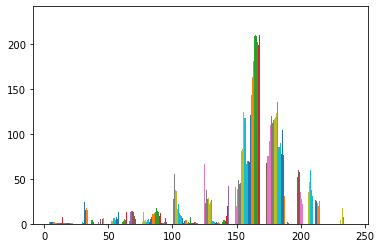

In [5]:
plt.hist(img_games[0,2,:,:,0])

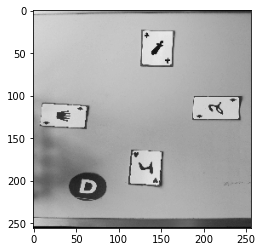

In [6]:
plt.imshow(img_games[0,2,:,:,0],cmap='gray')

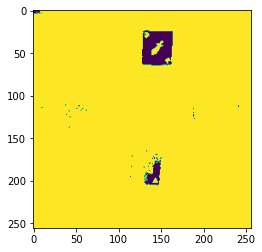

In [7]:
plt.imshow(img_games[0,2,:,:,0] < 210)

In [8]:
# weird one 
dataloader.csvs[-1]

{'game7.csv':     Unnamed: 0  P1  P2  P3  P4  D
 0            1 NaN NaN NaN NaN  4
 1            2 NaN NaN NaN NaN  3
 2            3 NaN NaN NaN NaN  2
 3            4 NaN NaN NaN NaN  1
 4            5 NaN NaN NaN NaN  1
 5            6 NaN NaN NaN NaN  3
 6            7 NaN NaN NaN NaN  4
 7            8 NaN NaN NaN NaN  2
 8            9 NaN NaN NaN NaN  2
 9           10 NaN NaN NaN NaN  2
 10          11 NaN NaN NaN NaN  4
 11          12 NaN NaN NaN NaN  3
 12          13 NaN NaN NaN NaN  3}

---
## 3. Your Tasks

Your task is to ready yourself for the final evaluation. The day of the exam we will give you a new folder with a new game. ! The digits on the cards might sligthly **differ** from the one of the traning set. When given a new data folder with 13 images your should be able to:

**Task 0**
   - Plot an overlayF fr each round image that shows your detections and classification. You can for example plot bounding boxes around the cards/dealer token and add a text overlay with the name of the classes.

**Task 1**
   - (a) Predict the **rank** of the card played by each player at each round (Standard rules).
   - (b) Predict the **number of points** of each player according to **Standard** rules
 
**Task 2**
   - (a) Detect which player is the selected **dealer** for each round.
   - (b) Predict the **rank** and the **suit** of the card played by each player at each round (Advanced rules).
   - (c) Predict the **number of points** of each player according to **Advanced** rules


You will have to upload your code on moodle **the day before** the exam.

We will ask you to run your pipeline in realtime and to send us your prediction of task 1 and 2 obtain with the function **print_results**. On our side we will compute the perfomance of your classification algorithm. To evaluate your method we will use the **evaluate_game** function presented below. To understant how the provided functions work please read the documentation of the functions in **utils.py**.

**Please make sure your function returns the proper data format to avoid points penalty the day of the exam**. 

<b> Premice: </b>


### 3.1 Example Final results

Example of output you **should** provide the day of the final exam.

In [9]:
from utils import print_results
import numpy as np

# Creates dummy predictions (toy exmaple)
pred_rank = np.array(["0D"]*4*13).reshape((13, 4)) # Everyone played the "0 of spade".
pred_dealer = [1]*13                # List of players selected as dealer for each round
pred_pts_stand = [0,0,0,13]         # Player 4 won 13 points with standard rules.
pred_pts_advan = [0,0,8,7]          # Player 3 and 4 won 8 and 7 points with adv, rules respectively.

print_results(
    rank_colour=pred_rank, 
    dealer=pred_dealer, 
    pts_standard=pred_pts_stand,
    pts_advanced=pred_pts_advan,
)

The cards played were:
[
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
]
Players designated as dealer: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Players points (standard): [0, 0, 0, 13]
Players points (advanced): [0, 0, 8, 7]


### 3.2 Example Accuracy

Example of code you can use to validate the performance of your model. Be careful the day of the exam you will not have access to the ground truth of the predictions.

In [10]:
from utils import evaluate_game
import pandas as pd
#! You will need pandas libary to run the example. Please install the package using pip or conda commands !

# Load ground truth from game 1
cgt = pd.read_csv('train_games/game1/game1.csv', index_col=0)
cgt_rank = cgt[['P1', 'P2', 'P3', 'P4']].values

# Compute accuracy of prediction
acc_standard = evaluate_game(pred_rank, cgt_rank, mode_advanced=False)
acc_advanced = evaluate_game(pred_rank, cgt_rank, mode_advanced=True)
print("Your model accuracy is: Standard={:.3f}, Advanced={:.3f}".format(acc_standard, acc_advanced))

Your model accuracy is: Standard=0.077, Advanced=0.019


### Necessary functions : 

Before doing anything, we need to create specific sets of functions in order to : <br>
    1) Segmentate the image (Lab 1) <br>
    2) Extract object and describe them (Lab 2) <br>
    3) Use extracted object in order to make a classification (Lab 3) <br>

For each section, we provide the different methods implented in each lab (we will choose the one that is better suited for this project)


## Important note :

During that Q&A, they explained that we can train our model with MNIST library in order to make the classification better. It's possible to make an almost 100% accurate prediction.



## From Lab 1 : 


## Region Growing: 



In [9]:
def get_neighbours_not_in_region(pixel, output):
    """
    Function returning a list containing the 8 neighbours of pixel which are not already segmented 
    in output (ignoring those neighbours which would fall out of the image boundaries).
    
    Args:
        pixel::[tuple]
            Tuple of form (line, col) containing the pixel we want to compute the neighbours of.
        output::[np.array]
            Output segmentation mask of same shape as original grayscale image.
    Returns:
        neighbours_not_in_region::[list]
            List of pixels (tuples of same form as pixel parameter), containing the neighbours of
            pixel parameter which are not already segmented in output and that are in image boundaries.
    """
    pixel_line , pixel_col  = pixel
    image_lines, image_cols = output.shape
    
    neighbours_not_in_region = []
    for delta_line in [-1, 0, +1]:
        neighbour_line = pixel_line + delta_line
        
        # If we are outside the image, skip these pixels.
        if neighbour_line < 0 or neighbour_line >= image_lines:
            continue
        
        for delta_col in [-1, 0, +1]:
            # If we are on current pixel, skip this pixel.
            if delta_line == 0 and delta_col == 0:
                continue
            
            neighbour_col = pixel_col + delta_col
            
            # If we are outside the image, skip these pixels.
            if neighbour_col < 0 or neighbour_col >= image_cols:
                continue
            
            # Add neighbour if not already in the region.
            neighbour = (neighbour_line, neighbour_col)
            if not output[neighbour]:
                neighbours_not_in_region.append(neighbour)
                
    return neighbours_not_in_region
    

def segment_region_growing(image, seed, threshold, neighbourhood_size):
    """
    Function returning a segmentation mask computed by region growing from seed.
    
    Args:
        image::[np.array]
            Input image on which we want to perform region growing.
        seed::[tuple]
            Tuple of form (line, col) containing the pixel we want to start growing the region from.
        threshold::[float]
            Threshold for deciding if new pixel is included in region.
        neighbourhood_size::[int]
            Size of the neighbourhood of current pixel on which to calculate the mean. Must be >0 and
            if even number is given, neighbourhood_size+1 is used instead.
    Returns:
        output::[np.array]
            Output segmentation mask performed by region growing with seed as starting pixel.
    """
    assert(neighbourhood_size >= 0)
    delta_lower = -(neighbourhood_size//2)
    delta_upper = +(neighbourhood_size//2)+1
        
    output = np.zeros_like(image, dtype = np.bool_)
    
    pixels_to_treat = [seed]
    
    while pixels_to_treat:
        current_pixel = pixels_to_treat[-1]
        pixels_to_treat.pop()
        
        output[current_pixel] = True
        
        for neighbour in get_neighbours_not_in_region(current_pixel, output):            
            neighbourhood_mean = float(np.mean(image[current_pixel[0]+delta_lower:current_pixel[0]+delta_upper, 
                                                     current_pixel[1]+delta_lower:current_pixel[1]+delta_upper]))
            
            if abs(neighbourhood_mean - image[neighbour]) < threshold:
                pixels_to_treat.append(neighbour)
                
    return output

## Contour detection


In [10]:
def segment_countour_detection(image, canny_threshold_low, canny_threshold_high, dilation_structuring_element, seed):
    """
    Function returning the results of the Canny Edges detector and the mask obtained by
    performing connected component inside the brain to isolate it.
    
    Args:
        image::[np.array]
            Input image on which we perform contour edge detection.
        canny_threshold_low::[float] 
            Value of the low threshold for Canny edge detector's hysteresis.
        canny_threshold_high::[float]
            Value of the high threshold for Canny edge detector's hysteresis.
        dilation_structuring_element::[np.array]
            Kernel used to dilate and connected the edges made by Canny edge detector.
        seed::[tuple]
            Tuple of form (line, col) containing a pixel we know is in the brain.
    Returns: 
        canny_detector::[np.array]:
            Image output of the Canny detector.
        mask::[np.array]:
            Output segmentation mask of the brain.
    """
    # Edge detection.
    canny_detector = cv.Canny(brain_median, canny_threshold_low, canny_threshold_high)
    
    # In order to segment the brain, we must first close the edges.
    # To do so, we dilate the image edges.
    dilated = cv.dilate(canny_detector, dilation_structuring_element)
    
    # Segmenting with cv.connectedComponent requires background of image to be black and 
    # foreground to be white. Thus we take the negative of the image.
    dilated = np.where(dilated > 0, 0, 255).astype(np.uint8)

    # Segmenting.
    _, segmented = cv.connectedComponents(dilated)
    mask         = segmented == segmented[seed]

    # Dilation of segmented area to counteract previous dilation of borders.
    mask = cv.dilate(mask.astype(np.uint8), kernel)

    return canny_detector, mask

### Our own segmentation methods

In [11]:
def segment_custom_thresholding(image, threshold_low, threshold_high, seed):
    """
    Function returning a segmentation mask computed by thresholding the
    input image between threshold_low and threshold_high and keeping only
    the region containing seed.
    
    Args:
        image::[np.array]
            Input image on which we perform segmentation.
        threshold_low::[float] 
            Value of the low grayscale threshold for image.
        threshold_high::[float]
            Value of the high grayscale threshold for image.
        seed::[tuple]
            Tuple of form (line, col) containing a pixel we know is in the brain.
    Returns:
        mask::[np.array]:
            Output segmentation mask of the brain.
    """

    # Carefully chosen thresholding.
    thresholded = np.logical_and(brain_im > threshold_low, brain_im < threshold_high).astype(np.uint8)

    # Segmenting.
    _, labels   = cv.connectedComponents(thresholded)
    mask        = (labels == labels[seed]).astype(np.uint8)
    
    return mask

### Shape\color classification 

In [12]:
def get_blue_black_masks(image):
    """
    Function returning mask of pixels in image which are in the color range of blue and black.
    
    Args:
        image::[np.array]
            Input image for which we want to detect the blue and black pixels.
    Returns:
        blue_mask::[np.array]
            Mask of same size as input image containing the detected blue pixels in image.
        black_mask::[np.array]
            Mask of same size as input image containing the detected black pixels in image.
    """
    image_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)
    
    image_hsv[:,:,2] = cv.equalizeHist(image_hsv[:,:,2])
    
    blue_mask  = cv.inRange(image_hsv, (90, 50, 4), (135, 255, 255))
    black_mask = cv.inRange(image_hsv, (0, 0, 0)  , (180, 255, 3))
    
    return blue_mask, black_mask


def detect_same_object(component1, component2, tolerance):
    """
    Function returning whether two components are sufficiently close to be classified as belonging
    to same object. 
    
    Args:
        component1::[dict]
            Dictionary of form {"centroid": np.array, "width": float, "height": float} containing
            information about the first connected component.
        component2::[dict]
            Dictionary of form {"centroid": np.array, "width": float, "height": float} containing
            information about the second connected component.        
        tolerance::[float]
            Tolerance in inequality check to decide whether components are close enough.
    Returns:
        output::[boolean]
            True if the components are close enough to probably be part of the same object, False
            otherwise.
    """
    distance = np.linalg.norm(component1["centroid"] - component2["centroid"])
    radius_component1 = (component1["width"] + component1["height"]) / 4 
    radius_component2 = (component2["width"] + component2["height"]) / 4 

    if distance <= radius_component1 + tolerance or distance <= radius_component2 + tolerance:
        return True
    
    return False


def get_objects_from_mask(mask, tolerance = 10, min_size = 50):
    """
    Function returning segmentation mask of objects obtained by cleaning the color mask passed
    as parameter. 
    
    Args:
        mask::[np.array]
            Image mask obtained by color thresholding.
        tolerance::[float]
            Tolerance in inequality check to decide whether components are close enough.
        min_size::[int]
            Minimum size in number of pixels of component to be considered a valid object.
    Returns:
        objects_mask::[np.array]
            Mask of same size as input mask segmenting the objects which are large enough and
            grouped into one object if they are close enough.
    """
    num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(mask)
    
    # Merging close components that belong to same object, skipping background labeled 0.
    new_labels = {}
    for component1 in range(1, num_labels):
        parameters1 = {"centroid": np.array(centroids[component1]), "width": stats[component1, cv.CC_STAT_WIDTH], "height": stats[component1, cv.CC_STAT_HEIGHT]}
        for component2 in range(component1 + 1, num_labels):
            parameters2 = {"centroid": np.array(centroids[component2]), "width": stats[component2, cv.CC_STAT_WIDTH], "height": stats[component2, cv.CC_STAT_HEIGHT]}
            if detect_same_object(parameters1, parameters2, tolerance):
                new_labels[component2] = component1
    
    # Solves conflicts caused by values in dictionary which are also keys.
    key_value_conflicts = [key for key, value in new_labels.items() if value in new_labels.keys()]
    while key_value_conflicts:
        for conflict in key_value_conflicts:
            new_labels[conflict] = new_labels[new_labels[conflict]]
        key_value_conflicts = [key for key, value in new_labels.items() if value in new_labels.keys()]
    
    # Merges close components that belong to same object.
    for old_component, new_component in new_labels.items():
        labels[labels == old_component] = new_component
    
    # Removes too small groups (merges them with background).
    unique, counts = np.unique(labels, return_counts=True)
    for component, n_pixels in zip(unique, counts):
        if n_pixels < min_size:
            labels[labels == component] = 0
           
    # Creates mask from components not in background.
    objects_mask = labels > 0
        
    return len(np.unique(labels[objects_mask])), objects_mask

## From Lab 2 : 


### Fourier Descriptor : 

In [13]:
def get_fourier_descriptor(image, n_coefficients_to_keep = 2):
    """
    Function returning a Fourier descriptor of image made by keeping the first n_coefficients_to_keep coefficients
    (not including the bias coefficient).
    
    Args:
        image::[np.array]
            Image we want to compute the Fourier descriptor of.
        n_coefficients_to_keep::[int]
            Number of coefficients (not including the bias coefficient) to keep to make up the Fourier descriptor.
    Returns:
        fourier_descriptor::[np.array]
            Array of size (n_coefficients_to_keep, ) where each element is one Fourier descriptor coefficient.
    """
    # Compute outer contours of image.
    _, contours, _ = cv.findContours(image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    
    # Isolating longest contour from the rest
    len_contours = [len(contour) for contour in contours]
    idx_longest_contour = np.argmax(len_contours)
    contour = contours[idx_longest_contour].squeeze()    
    
    # Make complex signal from contour array.
    complex_contour_signal = contour[:, 0] + 1j * contour[:, 1]
    
    # Compute fourier coefficients.
    fourier_coefficients = np.fft.fft(complex_contour_signal)
    
    # To make fourier coefficient resistant to scaling, ratio between coefficients is used instead of actual magnitude.
    fourier_coefficients = fourier_coefficients / fourier_coefficients[0]  
    
    # To make fourier coefficient resistant to translation, first coefficient discarded.
    fourier_coefficients = fourier_coefficients[1:]
    
    # To make fourier coefficient resistant to rotation, phase is discarded.
    fourier_coefficients = np.abs(fourier_coefficients)  
    
    return fourier_coefficients[:n_coefficients_to_keep]


def pretreat_image(image):
    """
    Function performing a basic pretreatement of the image to remove high-frequency noise and binarize it.
    
    Args:
        image::[np.array]
            Image we want to remove noise from and binarize. 
    Returns:
        image_binary::[np.array]
            Binary image of same size as image parameter obtained after median filtering and binary thresholding.
    """
    image_uniform_background = np.where(image > 50, image, 0)
    image_denoised = cv.medianBlur(image_uniform_background, 3)
    image_binary = (image_denoised > 20).astype(np.uint8)
    
    return image_binary


def plot_descriptors(coefficients_digits_list, marker_digits_list, label_digits_list, xlabel, ylabel):
    """
    Function making a scatter plot of the first two elements of each descriptor in coefficients_digits_list 
    using the corresponding marker in marker_digits_list and legend label in label_digits_list.
    
    Args:
        coefficients_digits_list::[np.array]
            Array of shape (n_digits, n_images_per_digit, >=2) containing for each digit type and each image
            per digit type an image descriptor of size larger or equal to 2.
        marker_digits_list::[list]
            List of size (n_digits, ) containing the marker to use in the scatter plot for each different digit.
        label_digits_list::[list]
            List of size (n_digits, ) containing the label to use in the legend for each different digit.
        xlabel::[string]
            Label to use on the horizontal axis.
        ylabel::[string]
            Label to use on the vertical axis.
    Returns:
        None
    """    
    assert(len(coefficients_digits_list) == len(marker_digits_list) == len(label_digits_list))

### Mu Moments :

In [14]:
def get_hu_moments_descriptor(image, moments_to_keep = (1, 2)):
    """
    Function returning the Hu Moments at positions moments_to_keep computed from image.
    
    Args:
        image::[np.array]
            Image we want to compute the Hu Moments descriptor of.
        moments_to_keep::[tuple]
            Which of the computed Hu Moments we want to use to make up the image descriptor.
    Returns:
        hu_moments_descriptor::[np.array]
            Array of size (len(moments_to_keep), ) where each element is one Hu Moments descriptor coefficient.
    """
    moments    = cv.moments(image)
    hu_moments = cv.HuMoments(moments).flatten()
    
    return hu_moments[np.array(moments_to_keep)]

## From Lab 3 : 

Here, it seems we can only use the MLP method to make the classification. We won't be able to calculate the decision line at the exam...

In [15]:
"""
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha = 1e-4, hidden_layer_sizes = (100,), max_iter = 500, early_stopping = True)

clf.fit(train_images.reshape(train_images.shape[0], -1), train_labels);
"""

"\nfrom sklearn.neural_network import MLPClassifier\n\nclf = MLPClassifier(solver='adam', alpha = 1e-4, hidden_layer_sizes = (100,), max_iter = 500, early_stopping = True)\n\nclf.fit(train_images.reshape(train_images.shape[0], -1), train_labels);\n"